# Multiple Regression

In [129]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, classification_report
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from statsmodels.stats.outliers_influence import summary_table

sns.set()
%matplotlib inline

## Dataset
This project uses a Kaggle dataset from the 2019 World Happiness report from the United Nations that measures the happiness of more than 100 countries. This example builds upon a Linear Regression example in this repository, but now we are going to incorporate more independent variables into our model for predicting a country's happiness score.

In [90]:
data = pd.read_csv(r'/Users/prof/Documents/Examples/WorldHappiness2019.csv')
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### Take a quick look at the data
Make sure we understand both the datatypes and the number of observations for each variable. Note that we have 156 observations for each variable and our only non-numeric variable is the Country or region name.

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


#### Describe the data 

In [92]:
data.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [93]:
data.corr(method = 'pearson')

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


#### Create model dataset
Using the correlation coefficients above we can identify a handful of variables we want to use in our multiple regression model to predict Happiness score. These variables hav ea correlation coefficient greater than 0.50 which falls in the category of moderately correlated.

In [94]:
modeldata = data[['Score', 'GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices']]
modeldata.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,7.769,1.340,1.587,0.986,0.596
1,7.600,1.383,1.573,0.996,0.592
2,7.554,1.488,1.582,1.028,0.603
3,7.494,1.380,1.624,1.026,0.591
4,7.488,1.396,1.522,0.999,0.557


# Data Discovery and Assumption Testing

In this section we will explot our dataset, run a multiple regression model and test the assumptions of our multiple regression model. These assumptions will look similar to simple linear regression, but we have some additional tests that apply with multiple regression. First lets use Seaborn to plot each of our variables against one another and visually evaluate the relationships between our variables.

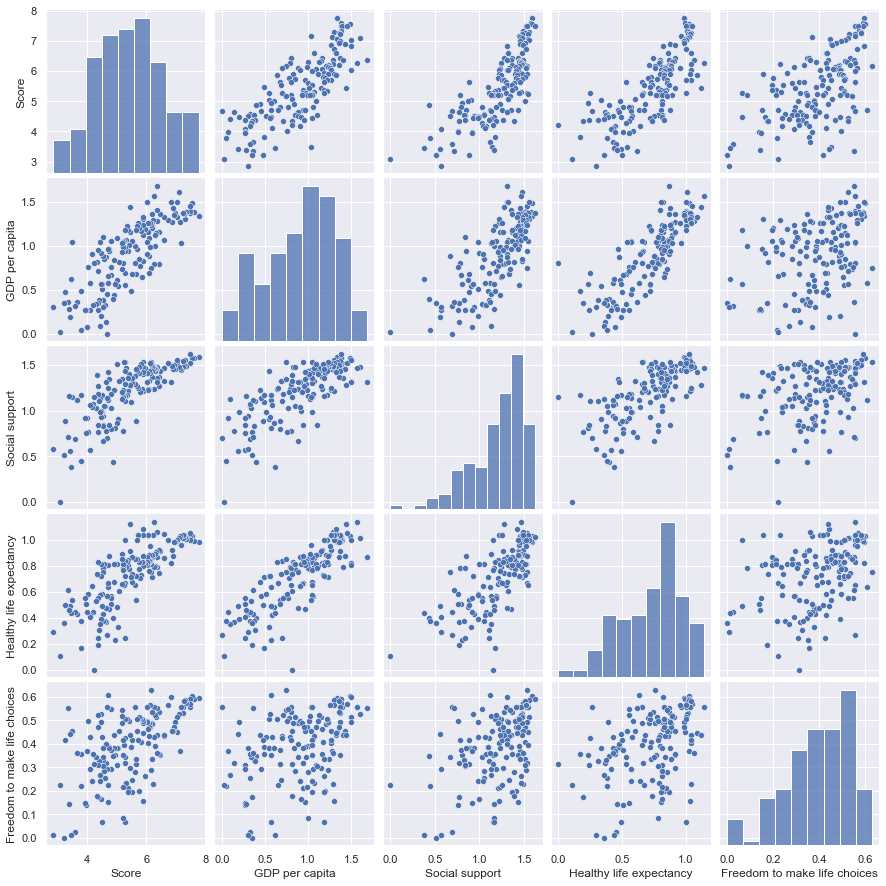

In [95]:
sns.pairplot(modeldata[['Score', 'GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices']])

#### Fitting Multiple Regression model
In our multiple regression model, we will use Statsmodels to create a build a fit a multiple regression model, then we will look at the assumptions of our multiple regression model.

In [125]:
x = modeldata[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices']]
y = modeldata['Score']

model = sm.OLS(y, x)
modelfit = model.fit()
modelfit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.985
Method:                 Least Squares   F-statistic:                              2534.
Date:                Sat, 06 Mar 2021   Prob (F-statistic):                   5.87e-138
Time:                        20:51:19   Log-Likelihood:                         -159.11
No. Observations:                 156   AIC:                                      326.2
Df Residuals:                     152   BIC:                                      338.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
GDP per capita                   0.0709      0.254      0.279      0.781      -0.432       0.573
Social support                   2.3792      0.234     10.172      0.000       1.917       2.841
Healthy life expectancy          1.8868      0.413      4.567      0.000       1.071       2.703
Freedom to make life choices     2.5718      0.418      6.157      0.000       1.747       3.397
==============================================================================
Omnibus:                       10.966   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.796
Skew:                           0.542   Prob(JB):                      0.00274
Kurtosis:                       3.800   Cond. No.                         15.4
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Lets check out the output from our training multiple regression model.. One of the first things that stands out in our multiple regression model is that our GDP per capita variable has a p-value greater than 0.05. If this was a simple linear regression model and GDP per capita was our only variable, we might have reason to be concerned, but in multiple regression we might see that variables by themselves do not appear significant. What is more important in multiple regression is the p-value for our F-statistic which identifies if our model as a whole is significant. Our F-statistic is 2534 and the proc(F-stat) is less than 0.05 so we can conclude that while GDP per capita individually does not appear to be significant our model as a whole is significant at the 95% level. 

### Linearity of the model
The assumption of linearity indicates that y is a linear function of our features (x/independent variabels), if this assumption does not hold and we have non-linear relationships within the data we risk prediction errors. To test the linearity we can evaluate our predicted values against the observed y values and want to see a symmetrical distribution of points around our diagonal line. An alternative method is to evaluate the residual values plotted against our predicted y values where we want to see a symmetrical distribution of values around a (hopefully) horizontal line. 

Interpreting the plots below, for our predicted and observed values we see a linear relationship with a slight bend and our datapoints are not quite symmetrically distributed on either side of the line. Furthermore, oure predicted vs residuals plot doesn't look symmetrical either so we might have some issues with linearity. To correct for this non-linearity we could perform non-linear transformations on either our dependent or independent variables.

[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'Residuals')]

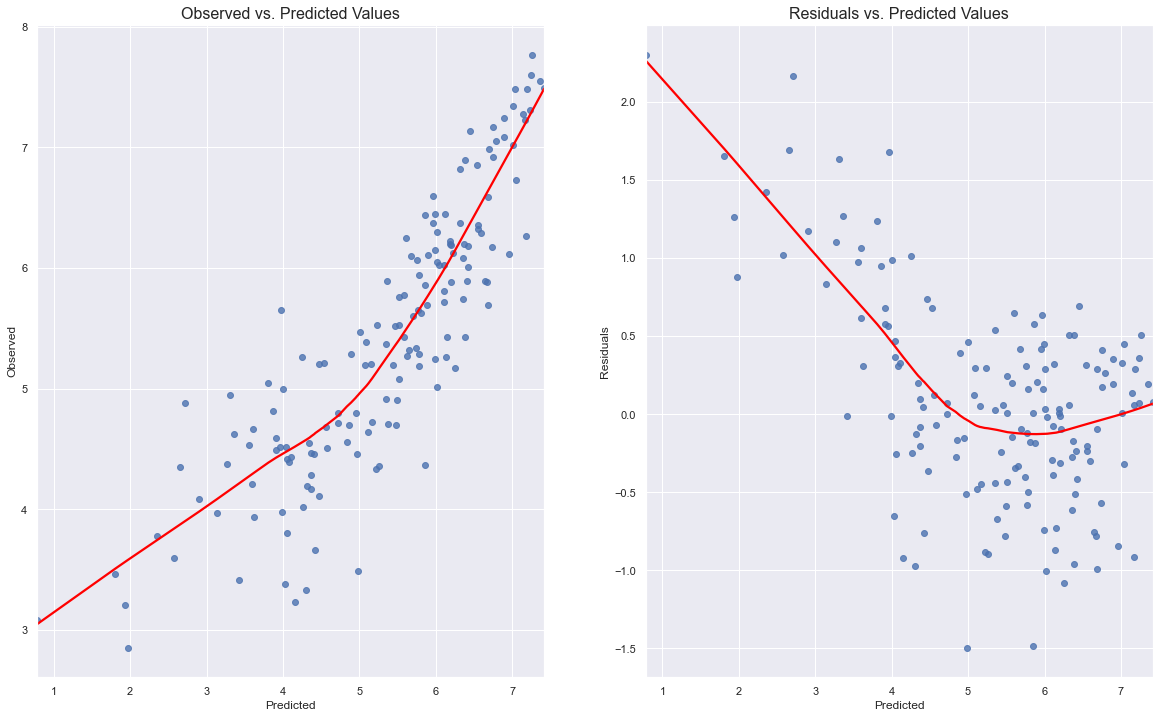

In [126]:
sns.mpl.rcParams['figure.figsize'] = (20, 12)

fitted_values = modelfit.predict()
resids = modelfit.resid

fig, ax = plt.subplots(1,2)

sns.regplot(x = fitted_values, y = y, lowess = True, ax = ax[0], line_kws = {'color' : 'red'})
ax[0].set_title('Observed vs. Predicted Values', fontsize = 16)
ax[0].set(xlabel = 'Predicted', ylabel = 'Observed')

sns.regplot(x = fitted_values, y = resids, lowess = True, ax = ax[1], line_kws = {'color' : 'red'})
ax[1].set_title('Residuals vs. Predicted Values', fontsize = 16)
ax[1].set(xlabel = 'Predicted', ylabel = 'Residuals')

### Expected Value of Residuals is Zero?
In linear regression, our objective is to fit a line through our datapoints where the sum of all differences between our predicted and actual values above the fitted line are equal to the sum of all differences between our predicted and actual values below the fitted line. 

The expected value of our residuals is not quite zero in this instance. This is something to keep in mind as we proceeed testing assumptions of our model, we might have some prediction error issues. 

In [127]:
modelfit.resid.mean()

0.08890561407023788

### Homoscedasticity
When the residuals from our model do not exhibit a constant variance, there will be issues determining the true standard deviation of our predictions. The inaccurate measurement of our standard deviation results in either too wide or too narrow confidence intervals for our predictions. When residuals do not exhibit a constant variance we call this heteroscedasticity, and we have a couple of methods to evaluate this assumption of our model. 

First we can look at a plot of the residuals against the predicted values, and we want to see an equal variance of our residuals across all of our observed y values. From our plot below, we cannot visually conclude that our residual values exhibit constant variance across all of our predicted values. Lets see what the Breusch-Pagan test says.

In the Breusch-Pagan (BP) test, we see our p-value is less than 0.05 which would indicate we will reject the null hypothesis that our data is homoscedastic and in fact our data might be exhibiting issues with heteroscedasticity which would be impacting our standard errors for our predictions.


 Breusch Pagan test
                                   Value
Lagrange multiplier statistic  27.647142
p-value                         0.000004
f-value                         8.185181
f p-value                       0.000005


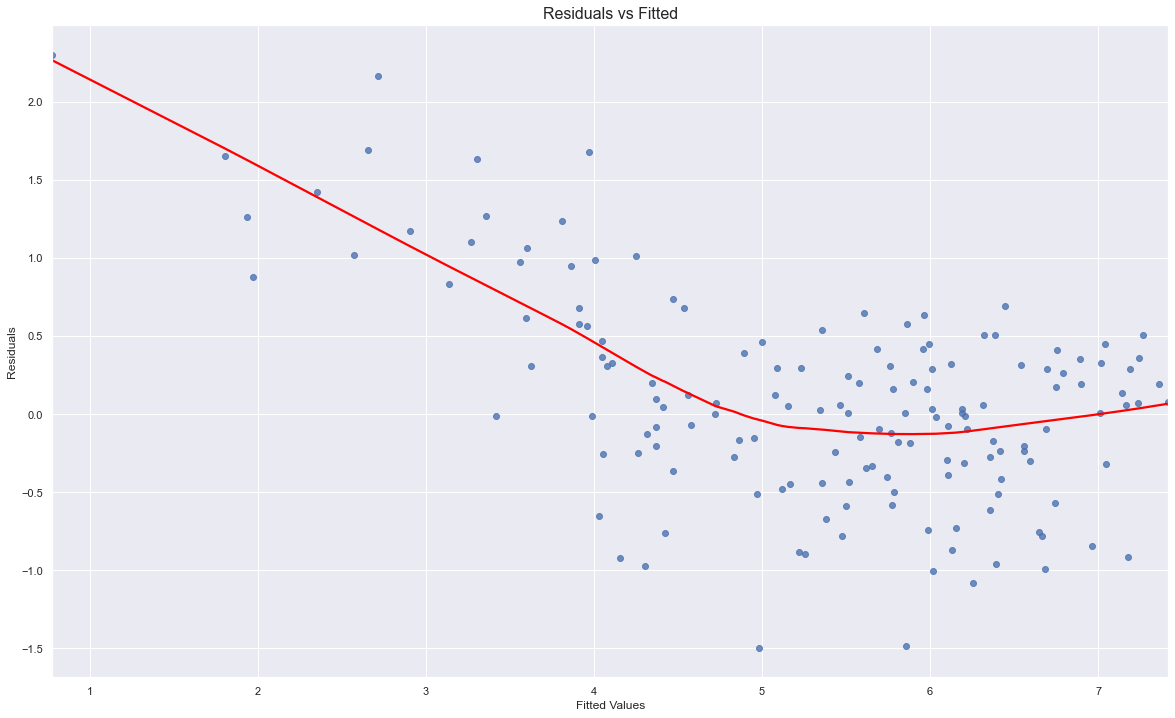

In [128]:
fitted_values  #Calculated earlier
resids         #Calculated earlier
resids_standardized = modelfit.get_influence().resid_studentized_internal


hetplot = sns.regplot(x = fitted_values, y = resids, lowess = True, line_kws = {'color' : 'red'}, )
hetplot.set_title('Residuals vs Fitted', fontsize = 16)
hetplot.set(xlabel = 'Fitted Values', ylabel = 'Residuals')

bp = pd.DataFrame(sms.het_breuschpagan(resids, modelfit.model.exog), 
                  columns = ['Value'], 
                  index = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])


print('\n Breusch Pagan test')
print(bp)

#### Testing for multicollinearity
In our model we want our independent variables to be independent from one another meaning there is no correlation or relationship between these variables. Multicollinearity impacts our models by making them less precise, so it is important to test for this assumption in our data. When our variables are highly correlated it might also be difficult to separate their individual impacts on our dependent variable. To test for multicollinearity we will use the Variance Inflation Factor (VIF). The greater the VIF value the greater the relationship is between our variables because the VIF value is a transformation of correlations between our variables. Lets look at the results below.

For the VIF test, a VIF score greater than five or ten would indicate our variables are highly correlated. It looks like multicollinearity is an issue for our dataset across all variables. To remove or handle multicollinearity we should remove variables from our model and rerun to see if we can reduce the multicollinearity among our variables. Another potential solution is to use Principal Component analysis to reduce our dataset into one or more uncorrelated components.

In [140]:
vifdf = pd.DataFrame()
vifdf['Column'] = x.columns

vifdf['VIF'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
vifdf

,Column,VIF
0,GDP per capita,21.331929
1,Social support,28.631984
2,Healthy life expectancy,33.662937
3,Freedom to make life choices,10.280102
